# Connect to Drive

In [ ]:
import os
import sys

In [ ]:
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DRIVE_PATH = os.path.join(MOUNTPOINT, 'My Drive')
drive.mount(MOUNTPOINT)
sys.path.append(os.path.join(DRIVE_PATH, 'matt_schoenbauer_qkeras_project'))
sys.path.append(os.path.join(DRIVE_PATH, 'matt_schoenbauer_qkeras_project', 'qkeras'))

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 1

In [ ]:
!pip install -r /content/gdrive/My\ Drive/matt_schoenbauer_qkeras_project/qkeras/requirements.txt > /dev/null

In [6]:
from time import time
from importlib import reload

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

%aimport timing_utils
%aimport correctness_utils 
%aimport alt_implementations
%aimport alt_implementations2

%aimport qkeras

File timing_utils.py Updated. Last modified 4 days, 1:14:48 seconds ago
File correctness_utils.py Updated. Last modified 22:36:53 seconds ago
File alt_implementations.py Updated. Last modified 12:25:52 seconds ago
File alt_implementations2.py Updated. Last modified 4 days, 1:18:16 seconds ago


# Correctness tests

In [7]:
1

1

In [ ]:
max_test_count = 50
correctness_utils.quantized_bits_linear_accuracy_tests(alt_implementations.quantized_bits2)
correctness_utils.quantized_bits_grid_accuracy_tests(alt_implementations.quantized_bits2, max_test_count=max_test_count)


Accuracy tests (linear):  83%|████████▎ | 20/24 [11:39<02:19, 34.96s/it]


AssertionError: ignored

In [123]:

# Debugging code for correctness tests
# This works when the noise factor is zero, but not otherwise

# kwargs = {'alpha': 'auto', 'bits': 4, 'integer': 1, 'symmetric': True, 
#           'keep_negative': True, 'qnoise_factor': 0.0, 'use_stochastic_rounding': False, 'use_ste': True}
kwargs = {'alpha': 'auto', 'symmetric': True, 'keep_negative': True}
kwargs = {}
baseline = correctness_utils.quantized_bits(**kwargs)
alt = alt_implementations.quantized_bits2(**kwargs)
stupid = quantized_bits_stupid(**{'alpha': 'auto'})
x = tf.random.normal((1,))



In [125]:
x

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.6332401], dtype=float32)>

In [124]:
baseline_res = baseline(x).numpy()
alt_res = alt(x).numpy()
# stupid_res = stupid(x).numpy()

print(alt_res, baseline_res)
baseline.scale, alt.scale

# print(stupid_res, baseline_res)
# baseline.scale, stupid.scale

ValueError: ignored

In [3]:
import tensorflow as tf

class MyClass:

  def __init__(self, *, pred):
    self.pred = tf.cast(pred, tf.bool)
    self.side_effect = tf.Variable(False, dtype=tf.bool)

  @tf.function
  def __call__(self):
      """Core quantization function"""

      # Data type conversion

      self.side_effect.assign(tf.cond(self.pred, self._true_func, self._false_func))

      tf.print(f'{self.side_effect = }')

  def _true_func(self):
    tf.print('Executing _true_func')
    return True

  def _false_func(self):
    tf.print('Executing _false_func')
    return False

pred = False
c = MyClass(pred=pred)
c()
print(f'{pred = }, {c.side_effect.numpy() = }\n')


Executing _false_func
self.side_effect = <tf.Variable 'Variable:0' shape=() dtype=bool>
pred = False, c.side_effect.numpy() = False



In [8]:
import tensorflow as tf

class MyClass:

    def __init__(self, *, pred):
        self.pred = tf.cast(pred, tf.bool)
        self.side_effect = None

    @tf.function
    def __call__(self):
        """Core quantization function"""

        result = tf.cond(self.pred, self._true_func, self._false_func)
        tf.print(f'{result = }')
        return result

    def _true_func(self):
        tf.print('Executing _true_func')
        return tf.constant(True)

    def _false_func(self):
        tf.print('Executing _false_func')
        return tf.constant(False)

pred = True
c = MyClass(pred=pred)
c.side_effect = c()
print(f'{pred = }, {c.side_effect = }\n')


Executing _true_func
result = <tf.Tensor 'cond/Identity:0' shape=() dtype=bool>
pred = True, c.side_effect = <tf.Tensor: shape=(), dtype=bool, numpy=True>



In [5]:
c.side_effect

<tf.Tensor 'cond/Identity:0' shape=() dtype=bool>

In [7]:
tf.convert_to_tensor(True, tf.bool)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
stupid.auto_alpha

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
alt._auto_alpha_computation(x)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.3828125, -0.0546875, -0.6328125,  0.4609375, -0.9921875,
       -0.9921875, -0.4921875,  0.8828125, -0.1015625, -0.6484375],
      dtype=float32)>

# **Time Display**

In [103]:
def display_runtime_results(quantized_bits_kwargs, func, error_bars=False, field='avg_time'):

  data_shapes = (
      (1, ), (10, ), (10, 10), (100, 10), (100, 100), (1000, 100),
      (1000, 1000), (10000, 1000), (10000, 3000), (10000, 10000)
  )
  max_iterations = 100
  max_time=10
  plot=True
  hardware = '/GPU:0'
  # hardware = '/TPU:0'


  print(f'\n{quantized_bits_kwargs = }\n')
  # Make kwargs hashable
  quantized_bits_kwargs = tuple(quantized_bits_kwargs.items())

  timing_utils.quantized_bits_speed_tests(func, hardware=hardware, data_shapes=data_shapes,
        max_iterations=max_iterations, max_time=max_time, plot=plot, 
        quantized_bits_kwargs=quantized_bits_kwargs, error_bars=error_bars, field=field)
  

In [104]:
quantized_bits_kwargs_list = [
    {},
    {'bits': 1},
    {'alpha': 'auto'},
    {'alpha': 'auto_po2'},    
]


In [118]:
1

File alt_implementations.py Updated. Last modified 0:00:35 seconds ago


1

In [119]:
for quantized_bits_kwargs in quantized_bits_kwargs_list:  
  display_runtime_results(
      quantized_bits_kwargs, alt_implementations.quantized_bits2, error_bars=False, 
      field='median_time')


quantized_bits_kwargs = {}



ValueError: ignored

# Zero-bit and negative-bit weirdness

In [ ]:
q_new = alt_implementations.quantized_bits2(bits=1)
q_old = correctness_utils.quantized_bits(bits=-10)
q_old_pos = correctness_utils.quantized_bits(bits=0, keep_negative=False)

In [ ]:
print(q_old(-1).numpy(), q_old(1).numpy())
print(q_old_pos(-1).numpy(), q_old_pos(1).numpy())

-1.0 1.0
0.0 1.0


# Archive

In [ ]:
timing_utils._quantized_bits_speed_test_data(quantized_bits2, hardware=hardware, data_shapes=data_shapes,
      max_iterations=max_iterations, max_time=max_time)

(    iterations  avg_time  time_std           shape       size
 0          100  0.002471  0.001176            (1,)          1
 1          100  0.002088  0.000160           (10,)         10
 2          100  0.002236  0.000691        (10, 10)        100
 3          100  0.002116  0.000342       (100, 10)       1000
 4          100  0.002044  0.000141      (100, 100)      10000
 5          100  0.002122  0.000564     (1000, 100)     100000
 6          100  0.002073  0.000673    (1000, 1000)    1000000
 7          100  0.005878  0.000464   (10000, 1000)   10000000
 8          100  0.012262  0.000605   (10000, 2000)   20000000
 9          100  0.031251  0.001046   (10000, 5000)   50000000
 10         100  0.063647  0.001364  (10000, 10000)  100000000,
     iterations  avg_time  time_std           shape       size
 0          100  0.000961  0.003858            (1,)          1
 1          100  0.000897  0.003691           (10,)         10
 2          100  0.000918  0.003761        (10, 10)   

In [ ]:
bool(tf.keras.backend.learning_phase())

File alt_implementations.py Updated. Last modified 0:00:50 seconds ago


False

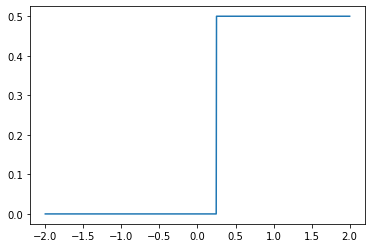

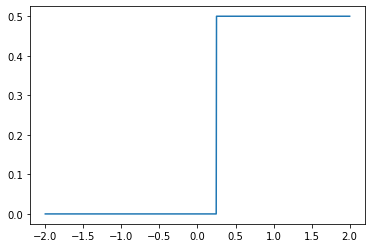

In [ ]:
def compute_func(function, x_min, x_max, num_points):

  x = np.linspace(x_min, x_max, num=num_points)
  return x, function(x)


def plot_func(function, x_min, x_max, num_points):

  x, f_x = compute_func(function, x_min, x_max, num_points)
  plt.plot(x, f_x)
  plt.show()


bits = 1
integer = 0
symmetric = True
keep_negative = False
qnoise_factor = 1.0

qbits = qkeras.quantized_bits(bits=bits,integer=integer,
symmetric=symmetric,
keep_negative=keep_negative,
qnoise_factor=qnoise_factor,)

qbits2 = alt_implementations.quantized_bits2(bits=bits,integer=integer,
symmetric=symmetric,
keep_negative=keep_negative,
qnoise_factor=qnoise_factor,)

x_min = -2
x_max = 2
num_points = 1000
plot_func(qbits,  x_min, x_max, num_points)
plot_func(qbits2,  x_min, x_max, num_points)

# Experiments with tf.cond

Conclusion- No domination either way between tf.cond and if/else statements in Python 

In [ ]:
@tf.function
def py_cond(x):

  if x.shape[0] > tf.constant(10):
    return 1
  else:
    return 0

@tf.function
def tf_cond(x):

  return tf.cond(tf.greater(x.shape[0], 10), lambda: 1, lambda: 0)

@tf.function
def tf_cond2(x):

  return tf.cond(tf.greater(x.shape[0], tf.constant(10)), lambda: 1, lambda: 0)

In [ ]:
import timing_utils

File timing_utils.py Updated. Last modified 0:00:25 seconds ago


In [ ]:
data_shapes = (
    (1, ), (10, ), (10, 10), (100, 10), (100, 100), (1000, 100),
    (1000, 1000), (10000, 1000), (10000, 2000), (10000, 5000), (10000, 10000)
)
max_iterations = 200
max_time=10
plot=True
hardware = '/GPU:0'
# hardware = '/TPU:0'
# hardware = '/CPU:0'
bits = 8

py_data = timing_utils.hardware_timeit(py_cond, hardware=hardware, data_shapes=data_shapes,
      max_iterations=max_iterations, max_time=max_time)
tf_data = timing_utils.hardware_timeit(tf_cond, hardware=hardware, data_shapes=data_shapes,
      max_iterations=max_iterations, max_time=max_time)
tf_data2 = timing_utils.hardware_timeit(tf_cond2, hardware=hardware, data_shapes=data_shapes,
      max_iterations=max_iterations, max_time=max_time)

In [ ]:
display(py_data, tf_data, tf_data2)

,iterations,avg_time,time_std,shape,size
0,200,0.000677,0.000206,"(1,)",1
1,200,0.000560,0.000154,"(10,)",10
2,200,0.000474,0.000081,"(10, 10)",100
3,200,0.000468,0.000080,"(100, 10)",1000
4,200,0.000479,0.000212,"(100, 100)",10000
5,200,0.000451,0.000026,"(1000, 100)",100000
6,200,0.000455,0.000031,"(1000, 1000)",1000000
7,200,0.000482,0.000132,"(10000, 1000)",10000000
8,200,0.000476,0.000040,"(10000, 2000)",20000000
9,200,0.000521,0.000069,"(10000, 5000)",50000000


,iterations,avg_time,time_std,shape,size
0,200,0.000618,0.000071,"(1,)",1
1,200,0.000612,0.000023,"(10,)",10
2,200,0.000616,0.000087,"(10, 10)",100
3,200,0.000644,0.000156,"(100, 10)",1000
4,200,0.000470,0.000059,"(100, 100)",10000
5,200,0.000465,0.000056,"(1000, 100)",100000
6,200,0.000443,0.000037,"(1000, 1000)",1000000
7,200,0.000447,0.000019,"(10000, 1000)",10000000
8,200,0.000506,0.000268,"(10000, 2000)",20000000
9,200,0.000454,0.000049,"(10000, 5000)",50000000


,iterations,avg_time,time_std,shape,size
0,200,0.000459,0.000031,"(1,)",1
1,200,0.000473,0.000065,"(10,)",10
2,200,0.000454,0.000026,"(10, 10)",100
3,200,0.000457,0.000025,"(100, 10)",1000
4,200,0.000471,0.000056,"(100, 100)",10000
5,200,0.000461,0.000045,"(1000, 100)",100000
6,200,0.000458,0.000045,"(1000, 1000)",1000000
7,200,0.000454,0.000026,"(10000, 1000)",10000000
8,200,0.000460,0.000058,"(10000, 2000)",20000000
9,200,0.000464,0.000038,"(10000, 5000)",50000000


In [ ]:
tf_data['avg_time'].mean()

0.0004875003207813609

In [ ]:
py_data['avg_time'].mean()

0.0011420809138904919

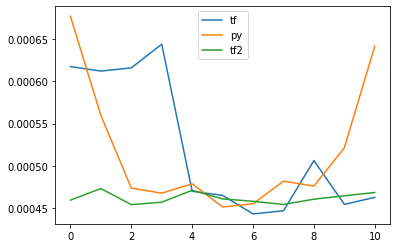

In [ ]:
plt.clf()
plt.plot(tf_data['avg_time'], label='tf')
plt.plot(py_data['avg_time'], label='py')
plt.plot(tf_data2['avg_time'], label='tf2')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(0)


In [ ]:
x = tf.sort(tf.random.normal((10, )))


In [ ]:

bits = 8
symmetric = True
axis = [0]

levels = (2 ** (bits - 1) - 1) * 2 if symmetric else (2 ** bits) - 1

scale = (tf.keras.backend.max(abs(x), axis=axis, keepdims=True) * 2) / levels


def _quantize_x(levels, scale, x):
    """Get x quantized to the nearest integer, capped at levels/2"""
    v = tf.floor(tf.abs(x) / scale + 0.5)
    mask = v < levels / 2
    z = tf.sign(x) * tf.where(mask, v, tf.ones_like(v) * levels / 2)
    return z

def _quantize_x2(levels, scale, x):
    """Get x quantized to the nearest integer, capped at levels/2"""
    scaled_x = x / scale
    clipped_scaled_x = tf.keras.backend.clip(scaled_x, -levels/2, levels/2)
    z = tf.round(clipped_scaled_x)
    return z




In [ ]:
_quantize_x(levels, scale, x).numpy()


array([-127.,  -57.,  -56.,  -32.,  -11.,    6.,   12.,   49.,   65.,
        125.], dtype=float32)

In [ ]:
np.all(_quantize_x2(levels, scale, x).numpy() == _quantize_x(levels, scale, x).numpy())


True

In [ ]:
x.numpy()

array([-1.2368279 , -1.0360373 , -0.41969493, -0.01397488,  0.42292207,
        0.47027302,  0.5997111 ,  0.60253334,  1.1888583 ,  1.5110626 ],
      dtype=float32)

In [ ]:
scale

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.01189813], dtype=float32)>